***Calibration***

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm

# Define the Heston model


def heston_model(params, S0, K, r, T, market_price):
    kappa, theta, sigma, rho, v0 = params
    dt = 1/252
    n = int(T/dt)
    s = np.zeros(n)
    v = np.zeros(n)
    s[0] = S0
    v[0] = v0
    for i in range(1, n):
        dz1 = norm.rvs()
        dz2 = rho*dz1 + np.sqrt(1-rho**2)*norm.rvs()
        v[i] = abs(v[i-1] + kappa*(theta-v[i-1]) *
                   dt + sigma*np.sqrt(v[i-1]*dt)*dz1)
        s[i] = s[i-1] * np.exp((r - 0.5*v[i])*dt + np.sqrt(v[i]*dt)*dz2)
    model_price = np.maximum(s[-1] - K, 0)
    error = np.mean(np.square(model_price - market_price))
    return error


# Define the market data
S0 = 100
K = 110
r = 0.02
T = 1
market_price = 10

# Set initial parameter values
params0 = [0.5, 0.05, 0.2, -0.5, 0.05]

# Minimize the error function
result = minimize(heston_model, params0, args=(S0, K, r, T, market_price))

# Print the calibrated parameters
print(result.x)


[ 0.5   0.05  0.2  -0.5   0.05]


In [2]:
# Set the calibrated parameters
kappa, theta, sigma, rho, v0 = result.x

# Define the Heston model
def heston_implied_vol(params, S0, K, r, T):
    kappa, theta, sigma, rho, v0 = params
    dt = 1/252
    n = int(T/dt)
    s = np.zeros(n)
    v = np.zeros(n)
    s[0] = S0
    v[0] = v0
    for i in range(1, n):
        dz1 = norm.rvs()
        dz2 = rho*dz1 + np.sqrt(1-rho**2)*norm.rvs()
        v[i] = abs(v[i-1] + kappa*(theta-v[i-1])*dt + sigma*np.sqrt(v[i-1]*dt)*dz1)
        s[i] = s[i-1] * np.exp((r - 0.5*v[i])*dt + np.sqrt(v[i]*dt)*dz2)
    model_price = np.maximum(s[-1] - K, 0)
    return model_price

print(heston_implied_vol((kappa, theta, sigma, rho, v0), 100, 110, 0.02, 1))

0.0


C:\Users\barna\AppData\Local\Temp\ipykernel_17752\1093814316.py:34: RuntimeWarning: divide by zero encountered in log
  return abs(norm.cdf(-np.log(model_price/S0)/sigma/np.sqrt(T)) - norm.cdf(-np.log(model_price/S0)/sigma/np.sqrt(T) + sigma*np.sqrt(T)))
C:\Users\barna\AppData\Local\Temp\ipykernel_17752\1093814316.py:34: RuntimeWarning: divide by zero encountered in log
  return abs(norm.cdf(-np.log(model_price/S0)/sigma/np.sqrt(T)) - norm.cdf(-np.log(model_price/S0)/sigma/np.sqrt(T) + sigma*np.sqrt(T)))
C:\Users\barna\AppData\Local\Temp\ipykernel_17752\1093814316.py:34: RuntimeWarning: divide by zero encountered in log
  return abs(norm.cdf(-np.log(model_price/S0)/sigma/np.sqrt(T)) - norm.cdf(-np.log(model_price/S0)/sigma/np.sqrt(T) + sigma*np.sqrt(T)))
C:\Users\barna\AppData\Local\Temp\ipykernel_17752\1093814316.py:34: RuntimeWarning: divide by zero encountered in log
  return abs(norm.cdf(-np.log(model_price/S0)/sigma/np.sqrt(T)) - norm.cdf(-np.log(model_price/S0)/sigma/np.sqrt(T) +

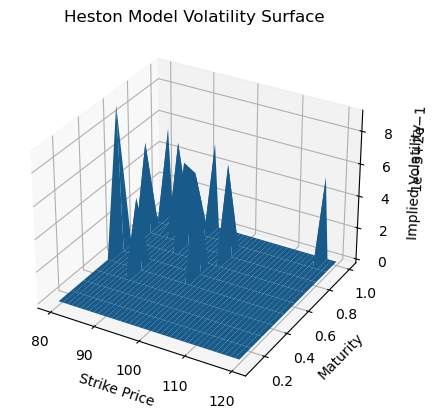

In [ ]:


# Define the strike prices and maturities to plot
strikes = np.linspace(80, 120, 41)
maturities = np.linspace(0.1, 1, 10)

# Calculate the implied volatilities
implied_vols = np.zeros((len(maturities), len(strikes)))
for i in range(len(maturities)):
    T = maturities[i]
    for j in range(len(strikes)):
        K = strikes[j]
        def f(sigma):
            params = [kappa, theta, sigma, rho, v0]
            model_price = heston_implied_vol(params, S0, K, r, T)
            return abs(norm.cdf(-np.log(model_price/S0)/sigma/np.sqrt(T)) - norm.cdf(-np.log(model_price/S0)/sigma/np.sqrt(T) + sigma*np.sqrt(T)))
        result = minimize(f, sigma)
        implied_vols[i,j] = result.x[0]

# Plot the volatility surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(strikes, maturities)
ax.plot_surface(X, Y, implied_vols)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied Volatility')
ax.set_title('Heston Model Volatility Surface')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Set the calibrated parameters
kappa, theta, sigma, rho, v0 = result.x

# Define the Heston model
def heston_option_price(params, S0, K, r, T):
    kappa, theta, sigma, rho, v0 = params
    dt = 1/252
    n = int(T/dt)
    s = np.zeros(n)
    v = np.zeros(n)
    s[0] = S0
    v[0] = v0
    for i in range(1, n):
        dz1 = norm.rvs()
        dz2 = rho*dz1 + np.sqrt(1-rho**2)*norm.rvs()
        v[i] = abs(v[i-1] + kappa*(theta-v[i-1])*dt + sigma*np.sqrt(v[i-1]*dt)*dz1)
        s[i] = s[i-1] * np.exp((r - 0.5*v[i])*dt + np.sqrt(v[i]*dt)*dz2)
    model_price = np.maximum(s[-1] - K, 0)
    return model_price

# Define the strike prices and maturities to plot
strikes = np.linspace(80, 120, 41)
maturities = np.linspace(0.1, 1, 10)

# Calculate the option prices
option_prices = np.zeros((len(maturities), len(strikes)))
for i in range(len(maturities)):
    T = maturities[i]
    for j in range(len(strikes)):
        K = strikes[j]
        option_prices[i,j] = heston_option_price([kappa, theta, sigma, rho, v0], S0, K, r, T)

# Plot the surface of the payoff
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(strikes, maturities)
ax.plot_surface(X, Y, option_prices)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Option Price')
ax.set_title('Heston Model Call Option Payoff')
plt.show()


ValueError: not enough values to unpack (expected 5, got 1)

In [3]:
def generate_heston_paths(S, T, r, kappa, theta, v_0, rho, xi,
                          steps, Npaths, return_vol=False):
    dt = T/steps
    size = (Npaths, steps)
    prices = np.zeros(size)
    sigs = np.zeros(size)
    S_t = S
    v_t = v_0
    for t in range(steps):
        WT = np.random.multivariate_normal(np.array([0, 0]),
                                           cov=np.array([[1, rho],
                                                         [rho, 1]]),
                                           size=paths) * np.sqrt(dt)

        S_t = S_t*(np.exp((r - 0.5*v_t)*dt + np.sqrt(v_t) * WT[:, 0]))
        v_t = np.abs(v_t + kappa*(theta-v_t)*dt + xi*np.sqrt(v_t)*WT[:, 1])
        prices[:, t] = S_t
        sigs[:, t] = v_t

    if return_vol:
        return prices, sigs

    return prices


Text(0, 0.5, 'Density')

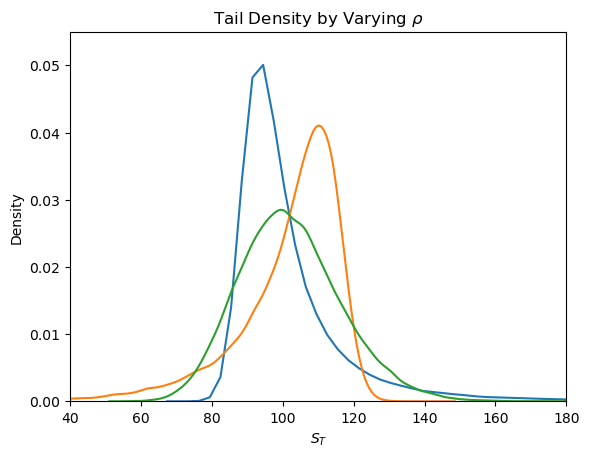

In [ ]:
import seaborn as sns
kappa = 4
theta = 0.02
v_0 = 0.02
xi = 0.9
r = 0.02
S = 100
paths = 50000
steps = 2000
T = 1

prices_pos = generate_heston_paths(S, T, r, kappa, theta,
                                   v_0, rho=0.9, xi=xi, steps=steps, Npaths=paths,
                                   return_vol=False)[:, -1]
prices_neg = generate_heston_paths(S, T, r, kappa, theta,
                                   v_0, rho=-0.9, xi=xi, steps=steps, Npaths=paths,
                                   return_vol=False)[:, -1]
gbm_bench = S*np.exp(np.random.normal((r - v_0/2)*T,
                                      np.sqrt(theta)*np.sqrt(T), size=paths))


fig, ax = plt.subplots()

ax = sns.kdeplot(data=prices_pos, label=r"$\rho = 0.9$", ax=ax)
ax = sns.kdeplot(data=prices_neg, label=r"$\rho= -0.9$ ", ax=ax)
ax = sns.kdeplot(data=gbm_bench, label="GBM", ax=ax)

ax.set_title(r'Tail Density by Varying $\rho$')
plt.axis([40, 180, 0, 0.055])
plt.xlabel('$S_T$')
plt.ylabel('Density')


In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize_scalar   
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)    
    

def implied_vol(opt_value, S, K, T, r, type_='call'):
    
    def call_obj(sigma):
        return abs(BS_CALL(S, K, T, r, sigma) - opt_value)
    
    def put_obj(sigma):
        return abs(BS_PUT(S, K, T, r, sigma) - opt_value)
    
    if type_ == 'call':
        res = minimize_scalar(call_obj, bounds=(0.01,6), method='bounded')
        return res.x
    elif type_ == 'put':
        res = minimize_scalar(put_obj, bounds=(0.01,6),
                              method='bounded')
        return res.x
    else:
        raise ValueError("type_ must be 'put' or 'call'")

In [19]:
strikes =np.arange(30, 200,1)

puts = [] 

for K in strikes:
    P = np.mean(np.maximum(K-prices_neg,0))*np.exp(-r*T)
    puts.append(P)


ivs = [implied_vol(P, S, K, T, r, type_ = 'put' ) for P, K in zip(puts,strikes)]

plt.plot(strikes, ivs)
plt.ylabel('Implied Volatility')
plt.xlabel('Strike')
plt.axvline(S, color='black',linestyle='--',
            label='Spot Price')
plt.title('Implied Volatility Smile from Heston Model')
plt.legend()

NameError: name 'prices_neg' is not defined

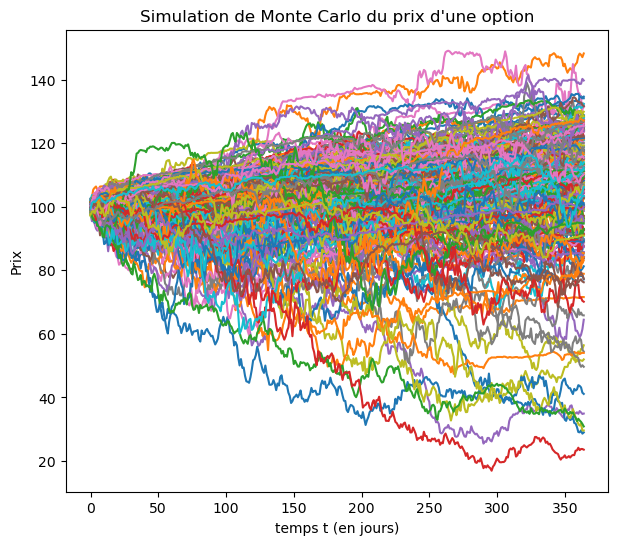

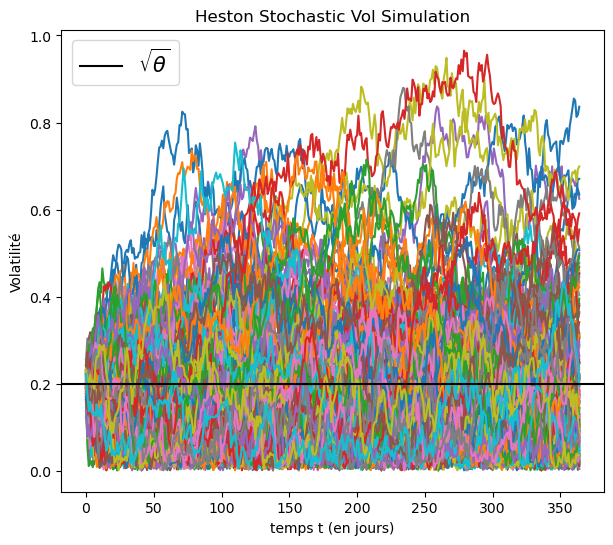

In [5]:
kappa =3
theta = 0.04
v_0 =  0.04
xi = 0.6
r = 0.05
S = 100
paths =200
steps = 365
T = 1
rho = -0.8
prices,sigs = generate_heston_paths(S, T, r, kappa, theta,
                                    v_0, rho, xi, steps, paths,
                                    return_vol=True)        
    
plt.figure(figsize=(7,6))
plt.plot(prices.T)
plt.title('Simulation de Monte Carlo du prix d\'une option')
plt.xlabel('temps t (en jours)')
plt.ylabel('Prix')
plt.show()

plt.figure(figsize=(7,6))
plt.plot(np.sqrt(sigs).T)
plt.axhline(np.sqrt(theta), color='black', label=r'$\sqrt{\theta}$')
plt.title('Heston Stochastic Vol Simulation')
plt.xlabel('temps t (en jours)')
plt.ylabel('Volatilité')
plt.legend(fontsize=15)
plt.show()

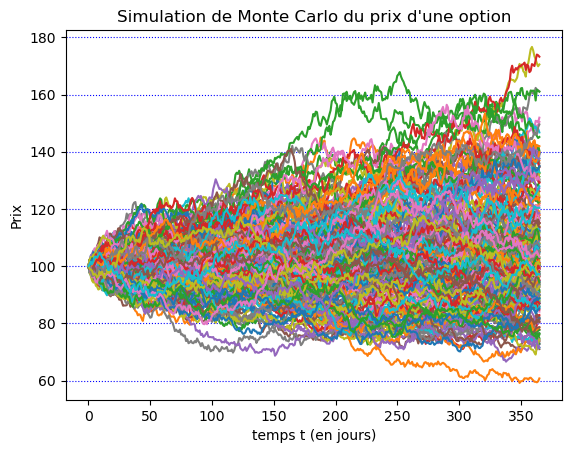

In [26]:
import numpy as np
import matplotlib.pyplot as plt


def bs_mc(S, K, r, sigma, T, option_type, num_simulations):
    """Calculate option price using Black and Scholes model by Monte Carlo simulation"""

    dt = 1/365
    num_steps = int(T/dt)
    S_arr = np.zeros((num_simulations, num_steps+1))
    S_arr[:, 0] = S

    for i in range(num_simulations):
        S_t = S
        for j in range(num_steps):
            S_t *= np.exp((r-0.5*sigma**2)*dt + sigma *
                          np.sqrt(dt)*np.random.normal())
            S_arr[i, j+1] = S_t

    if option_type == 'call':
        payoff = np.maximum(S_arr-K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K-S_arr, 0)
    else:
        raise ValueError('Invalid option type')

    option_price = np.mean(payoff)*np.exp(-r*T)
    return option_price, S_arr

# Example usage
S = 100
K = 105
r = 0.05
sigma = 0.2
T = 1
option_type = 'call'
num_simulations = 200
option_price, S_arr = bs_mc(S, K, r, sigma, T, option_type, num_simulations)
fig, ax = plt.subplots()
for i in range(num_simulations):
    ax.plot(np.arange(S_arr.shape[1]), S_arr[i])
ax.set_xlabel('temps t (en jours)')
ax.set_ylabel('Prix')
ax.set_title('Simulation de Monte Carlo du prix d\'une option')
plt.grid(axis='y', linestyle='dotted', color='b')
plt.show()


In [10]:
import numpy as np
from scipy.stats import norm

def heston_option_price(S, K, r, v0, theta, kappa, sigma, rho, T, option_type, steps, Npaths):
    # Parameters
    n_simulations = Npaths  # Number of Monte Carlo simulations
    n_steps = steps  # Number of time steps per year
    dt = T / n_steps  # Time step size

    # Generate correlated random numbers
    np.random.seed(0)
    Z1 = np.random.standard_normal((n_simulations, n_steps))
    Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.standard_normal((n_simulations, n_steps))

    # Initialize arrays
    price_paths = np.zeros((n_simulations, n_steps))
    volatility_paths = np.zeros((n_simulations, n_steps))
    price_paths[:, 0] = S
    volatility_paths[:, 0] = v0

    # Generate price and volatility paths
    for i in range(1, n_steps):
        volatility_paths[:, i] = volatility_paths[:, i-1] + kappa * (theta - volatility_paths[:, i-1]) * dt \
                                 + sigma * np.sqrt(volatility_paths[:, i-1] * dt) * Z2[:, i-1]
        price_paths[:, i] = price_paths[:, i-1] * np.exp((r - 0.5 * volatility_paths[:, i-1] ** 2) * dt \
                                                         + np.sqrt(volatility_paths[:, i-1] * dt) * Z1[:, i-1])

    # Calculate option prices
    if option_type == 'call':
        payoff = np.maximum(price_paths[:, -1] - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - price_paths[:, -1], 0)
    else:
        raise ValueError("Invalid option type. Choose 'call' or 'put'.")

    option_price = np.mean(payoff) * np.exp(-r * T)

    return option_price

In [37]:
kappa = 10
theta = 0.04
v_0 = 0.04
xi = 0.1
r = 0.05
S = 100
K = 110
paths = 3
steps = 365
T = 1
rho = -0.8
prices, sigs = generate_heston_paths(S, T, r, kappa, theta,
                                     v_0, rho, xi, steps, paths,
                                     return_vol=True)


In [ ]:
heston_prices = np.zeros((paths, steps))
i = 0
j = 0
for a in prices:
    j = 0
    for b in a:
        heston_prices[i][j] = heston_option_price(
            b, K, r, v_0, theta, kappa, xi, rho, T, "call", steps, paths)
        j+=1
    i += 1
    
# plt.subplot(211)
# plt.figure(figsize=(7,6))



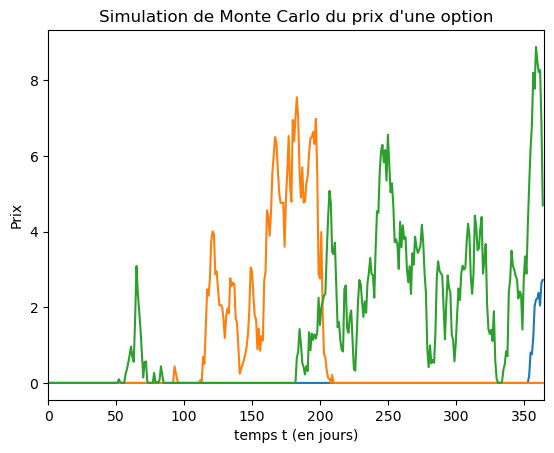

In [54]:
plt.plot(heston_prices.T)
plt.title('Simulation de Monte Carlo du prix d\'une option')
plt.xlabel('temps t (en jours)')
plt.ylabel('Prix')
plt.xlim((0, 365))
# plt.ylim((0, 300))

# plt.subplot(212)
# # plt.figure(figsize=(7,6))
# plt.plot(np.sqrt(sigs).T)
# plt.axhline(np.sqrt(theta), color='black', label=r'$\sqrt{\theta}$')
# plt.title('Heston Stochastic Vol Simulation')
# plt.xlabel('temps t (en jours)')
# plt.ylabel('Volatilité')
# plt.legend(fontsize=15)
plt.show()


In [48]:
prices[3][1]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [30]:
heston_option_price(99, K, r, v0, theta, kappa, xi, rho, T, option_type, steps, paths)
# heston_option_price(s, K, r, v0, theta, kappa, xi, rho, T, "call", steps, paths)

C:\Users\barna\AppData\Local\Temp\ipykernel_10408\4114992067.py:24: RuntimeWarning: invalid value encountered in sqrt
  + sigma * np.sqrt(volatility_paths[:, i-1] * dt) * Z2[:, i-1]
C:\Users\barna\AppData\Local\Temp\ipykernel_10408\4114992067.py:26: RuntimeWarning: invalid value encountered in sqrt
  + np.sqrt(volatility_paths[:, i-1] * dt) * Z1[:, i-1])


nan

In [27]:
# Import necessary libraries
import numpy as np

# Define option parameters
S = 100  # Initial stock price
K = 105  # Strike price
r = 0.05  # Risk-free interest rate
v0 = 0.1  # Initial volatility
theta = 0.1  # Long-term average volatility
kappa = 1.0  # Rate of mean reversion
sigma = 0.1  # Volatility of volatility
rho = -0.5  # Correlation between stock price and volatility
T = 1.0  # Time to expiration in years
option_type = 'call'  # Type of option ('call' or 'put')

# Calculate Heston option price
option_price = heston_option_price(99, K, r, v0, theta, kappa, sigma, rho, T, option_type, steps, paths)

# Print the result
print("Heston option price:", option_price)


Heston option price: 15.627536049982979
